In [1]:
import numpy as np
from datetime import datetime
import pandas as pd

In [2]:
df = pd.read_csv('/content/dataset_med.csv')

In [3]:
df.head()

,id,age,gender,country,diagnosis_date,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived
0,1,64.0,Male,Sweden,2016-04-05,Stage I,Yes,Passive Smoker,29.4,199.0,0.0,0.0,1.0,0.0,Chemotherapy,2017-09-10,0.0
1,2,50.0,Female,Netherlands,2023-04-20,Stage III,Yes,Passive Smoker,41.2,280.0,1.0,1.0,0.0,0.0,Surgery,2024-06-17,1.0
2,3,65.0,Female,Hungary,2023-04-05,Stage III,Yes,Former Smoker,44.0,268.0,1.0,1.0,0.0,0.0,Combined,2024-04-09,0.0
3,4,51.0,Female,Belgium,2016-02-05,Stage I,No,Passive Smoker,43.0,241.0,1.0,1.0,0.0,0.0,Chemotherapy,2017-04-23,0.0
4,5,37.0,Male,Luxembourg,2023-11-29,Stage I,No,Passive Smoker,19.7,178.0,0.0,0.0,0.0,0.0,Combined,2025-01-08,0.0


In [4]:
df.describe()

,id,age,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,survived
count,10185.00000,10185.000000,10184.000000,10184.000000,10184.00000,10184.000000,10184.000000,10184.000000,10184.000000
mean,5093.00000,54.770349,30.584191,234.148370,0.74293,0.475452,0.224666,0.087687,0.224863
std,2940.30058,10.018266,8.390605,43.530397,0.43704,0.499422,0.417383,0.282852,0.417512
min,1.00000,18.000000,16.000000,150.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,2547.00000,48.000000,23.300000,196.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,5093.00000,55.000000,30.700000,242.000000,1.00000,0.000000,0.000000,0.000000,0.000000
75%,7639.00000,62.000000,37.900000,272.000000,1.00000,1.000000,0.000000,0.000000,0.000000
max,10185.00000,93.000000,45.000000,300.000000,1.00000,1.000000,1.000000,1.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10185 entries, 0 to 10184
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  10185 non-null  int64  
 1   age                 10185 non-null  float64
 2   gender              10185 non-null  object 
 3   country             10185 non-null  object 
 4   diagnosis_date      10184 non-null  object 
 5   cancer_stage        10184 non-null  object 
 6   family_history      10184 non-null  object 
 7   smoking_status      10184 non-null  object 
 8   bmi                 10184 non-null  float64
 9   cholesterol_level   10184 non-null  float64
 10  hypertension        10184 non-null  float64
 11  asthma              10184 non-null  float64
 12  cirrhosis           10184 non-null  float64
 13  other_cancer        10184 non-null  float64
 14  treatment_type      10184 non-null  object 
 15  end_treatment_date  10184 non-null  object 
 16  surv

In [6]:
for col in df.columns:
  print(col)
  print(df[col].nunique())
  # print(df[col].unique())
  print()

id
10185

age
73

gender
2

country
28

diagnosis_date
3426

cancer_stage
4

family_history
2

smoking_status
4

bmi
291

cholesterol_level
151

hypertension
2

asthma
2

cirrhosis
2

other_cancer
2

treatment_type
4

end_treatment_date
3648

survived
2



In [7]:
df.isnull().sum()

,0
id,0
age,0
gender,0
country,0
diagnosis_date,1
cancer_stage,1
family_history,1
smoking_status,1
bmi,1
cholesterol_level,1


In [8]:
from sklearn.impute import SimpleImputer

for col in df.columns:
  if df[col].dtype == 'object':
    df[col] = df[col].fillna(df[col].mode()[0])
  else:
    df[col] = df[col].fillna(df[col].mean())


In [9]:
# df['diagnosis_date'] = pd.to_datetime(df['diagnosis_date'])
# df['end_treatment_date'] = pd.to_datetime(df['end_treatment_date'])

# # Duration in years
# df['treatment_duration_years'] = ((df['end_treatment_date'] - df['diagnosis_date']) // pd.Timedelta(days=365)).astype(float)

In [10]:
df.head()

,id,age,gender,country,diagnosis_date,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived
0,1,64.0,Male,Sweden,2016-04-05,Stage I,Yes,Passive Smoker,29.4,199.0,0.0,0.0,1.0,0.0,Chemotherapy,2017-09-10,0.0
1,2,50.0,Female,Netherlands,2023-04-20,Stage III,Yes,Passive Smoker,41.2,280.0,1.0,1.0,0.0,0.0,Surgery,2024-06-17,1.0
2,3,65.0,Female,Hungary,2023-04-05,Stage III,Yes,Former Smoker,44.0,268.0,1.0,1.0,0.0,0.0,Combined,2024-04-09,0.0
3,4,51.0,Female,Belgium,2016-02-05,Stage I,No,Passive Smoker,43.0,241.0,1.0,1.0,0.0,0.0,Chemotherapy,2017-04-23,0.0
4,5,37.0,Male,Luxembourg,2023-11-29,Stage I,No,Passive Smoker,19.7,178.0,0.0,0.0,0.0,0.0,Combined,2025-01-08,0.0


In [11]:
# df['age'] += df['treatment_duration_years']

In [12]:
df.columns

Index(['id', 'age', 'gender', 'country', 'diagnosis_date', 'cancer_stage',
       'family_history', 'smoking_status', 'bmi', 'cholesterol_level',
       'hypertension', 'asthma', 'cirrhosis', 'other_cancer', 'treatment_type',
       'end_treatment_date', 'survived'],
      dtype='object')

In [13]:
# df.drop(['id', 'diagnosis_date', 'end_treatment_date', 'treatment_duration_years'],axis = 1,inplace =True)
df.drop(['id', 'diagnosis_date', 'end_treatment_date'],axis = 1,inplace =True)

In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in df.columns:
  if df[col].dtype == 'object':
    df[col] = le.fit_transform(df[col])

In [15]:
df.head()

,age,gender,country,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,survived
0,64.0,1,27,0,1,3,29.4,199.0,0.0,0.0,1.0,0.0,0,0.0
1,50.0,0,20,2,1,3,41.2,280.0,1.0,1.0,0.0,0.0,3,1.0
2,65.0,0,12,2,1,1,44.0,268.0,1.0,1.0,0.0,0.0,1,0.0
3,51.0,0,1,0,0,3,43.0,241.0,1.0,1.0,0.0,0.0,0,0.0
4,37.0,1,18,0,0,3,19.7,178.0,0.0,0.0,0.0,0.0,1,0.0


In [16]:
X = df.drop('survived',axis = 1)
y = df['survived']

In [17]:
# from imblearn.over_sampling import SMOTE
# smote = SMOTE()
# y = y.astype(int) # Convert the target variable to integer type
# X, y = smote.fit_resample(X, y)

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

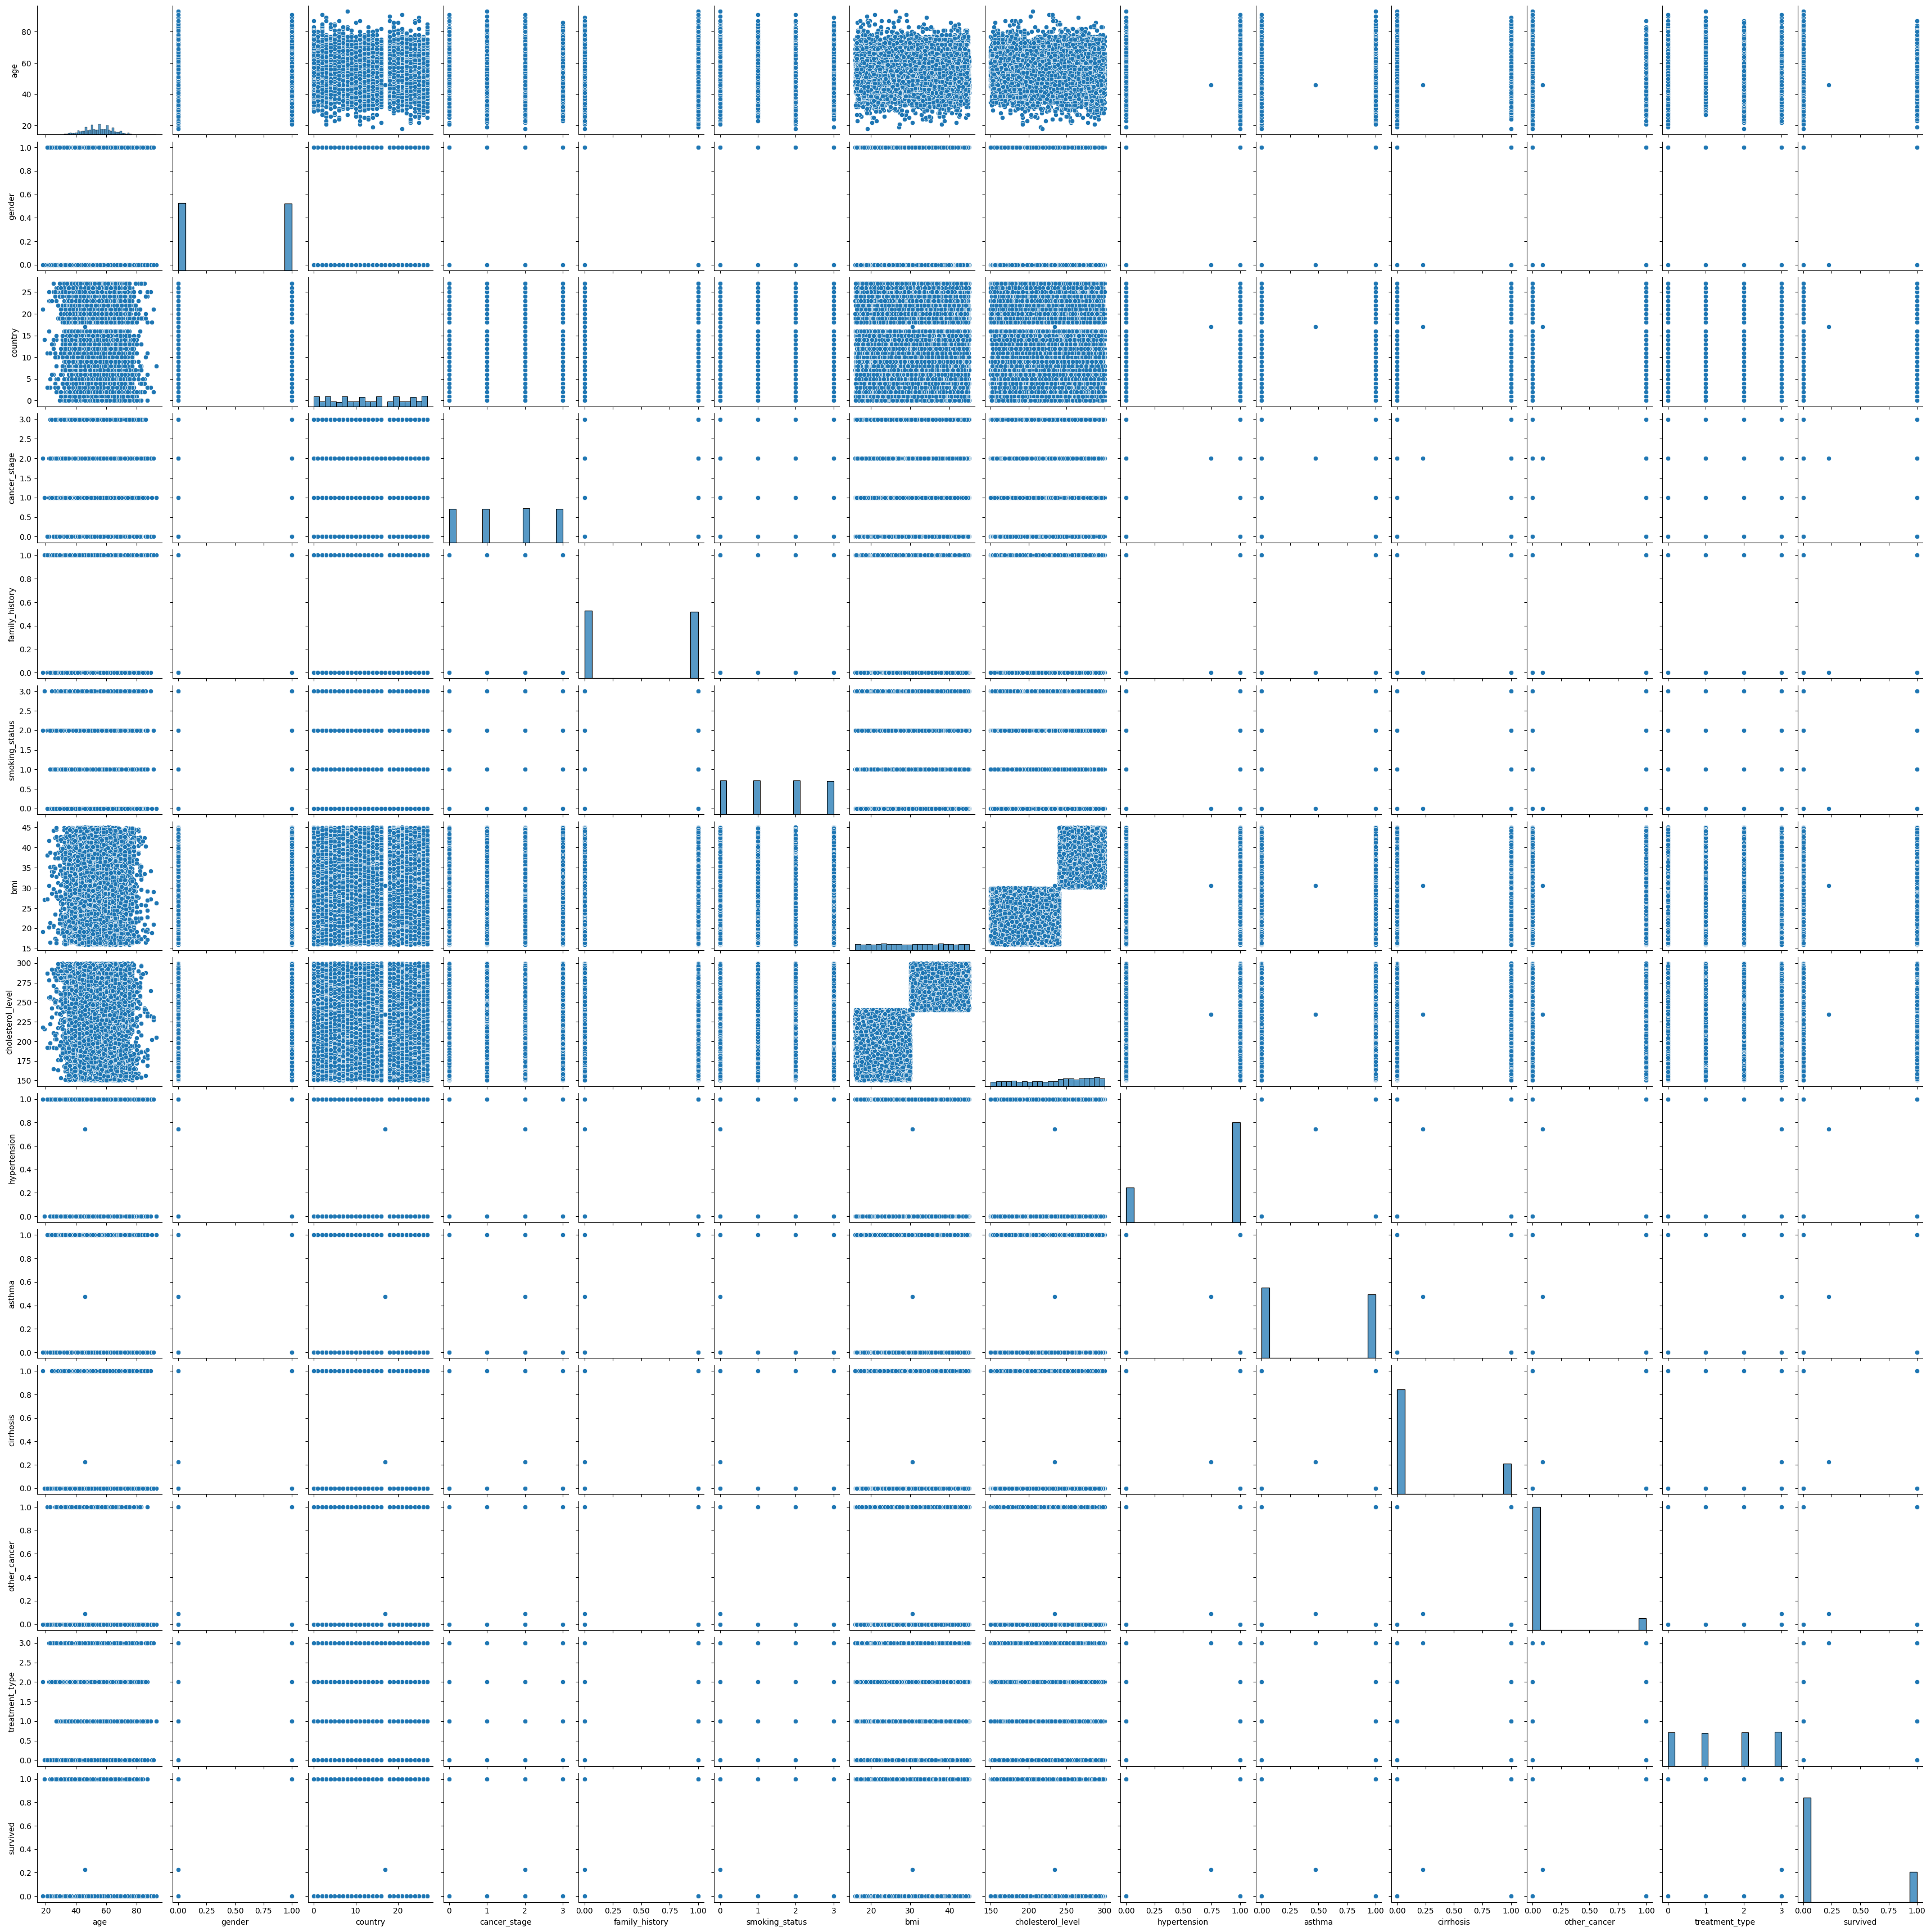

In [21]:
sns.pairplot(df)

<Axes: >

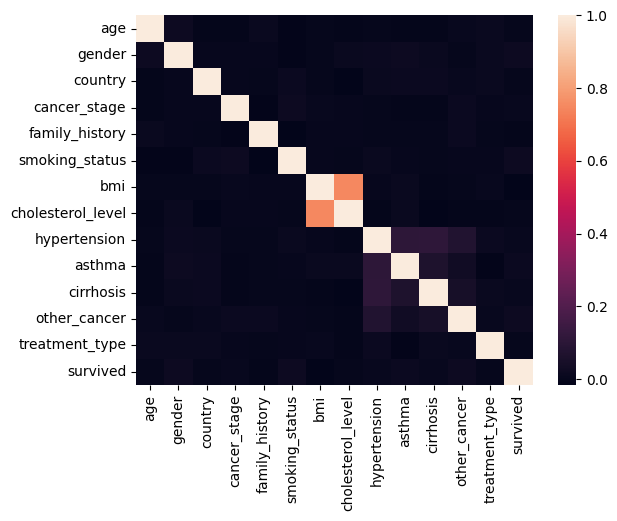

In [22]:
sns.heatmap(df.corr())

In [23]:
y_train = y_train.astype(int)
y_test = y_test.astype(int)

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, rf_preds))

Random Forest Accuracy: 0.7884143348060874


In [25]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(n_estimators=100, random_state=42)
ada.fit(X_train, y_train)
ada_preds = ada.predict(X_test)

print("AdaBoost Accuracy:", accuracy_score(y_test, ada_preds))

AdaBoost Accuracy: 0.7913598429062346


In [26]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb.fit(X_train, y_train)
gb_preds = gb.predict(X_test)

print("Gradient Boosting Accuracy:", accuracy_score(y_test, gb_preds))

Gradient Boosting Accuracy: 0.7884143348060874


In [27]:
from xgboost import XGBClassifier

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)
xgb_preds = xgb.predict(X_test)

print("XGBoost Accuracy:", accuracy_score(y_test, xgb_preds))

XGBoost Accuracy: 0.7511045655375552


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [08:46:39] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [28]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

log_clf = LogisticRegression(max_iter=1000)
svc_clf = SVC(probability=True)

voting = VotingClassifier(estimators=[
    ('lr', log_clf),
    ('rf', rf),
    ('xgb', xgb)
], voting='soft')  # Change to 'hard' for hard voting

voting.fit(X_train, y_train)
voting_preds = voting.predict(X_test)

print("Voting Classifier Accuracy:", accuracy_score(y_test, voting_preds))

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [08:46:41] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Voting Classifier Accuracy: 0.7879234167893961


In [29]:
from sklearn.ensemble import StackingClassifier

estimators = [
    ('rf', rf),
    ('ada', ada),
    ('gb', gb)
]

final_estimator = LogisticRegression(max_iter=1000)

stacking = StackingClassifier(
    estimators=estimators,
    final_estimator=final_estimator,
    cv=5
)

stacking.fit(X_train, y_train)
stack_preds = stacking.predict(X_test)

print("Stacking Classifier Accuracy:", accuracy_score(y_test, stack_preds))

Stacking Classifier Accuracy: 0.7913598429062346


In [30]:
X.shape

(10185, 13)

In [31]:
#try with NN

In [32]:
!pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 4.1 MB/s eta 0:00:00


In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adadelta
import keras_tuner as kt

def build_model(hp):
    model = Sequential()

    for i in range(hp.Int('num_layers', min_value=1, max_value=10)):
        if i == 0:
            model.add(Dense(
                units=hp.Int(f'units_{i}', min_value=8, max_value=128, step=8),
                activation=hp.Choice(f'activation_{i}', values=['relu', 'tanh', 'sigmoid']),
                input_dim=13
            ))
        else:
            model.add(Dense(
                units=hp.Int(f'units_{i}', min_value=8, max_value=128, step=8),
                activation=hp.Choice(f'activation_{i}', values=['relu', 'tanh', 'sigmoid'])
            ))
        model.add(Dropout(
            rate=hp.Float(f'dropout_{i}', min_value=0.1, max_value=0.9, step=0.1)
        ))

    # Output layer
    model.add(Dense(1, activation='sigmoid'))

    # Compile with tunable optimizer and learning rate
    optimizer_choice = hp.Choice('optimizer', values=['adam', 'sgd', 'rmsprop', 'adadelta'])
    learning_rate = hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='LOG')

    if optimizer_choice == 'adam':
        optimizer = Adam(learning_rate=learning_rate)
    elif optimizer_choice == 'sgd':
        optimizer = SGD(learning_rate=learning_rate)
    elif optimizer_choice == 'rmsprop':
        optimizer = RMSprop(learning_rate=learning_rate)
    else:
        optimizer = Adadelta(learning_rate=learning_rate)

    model.compile(optimizer=optimizer,
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    return model

In [34]:
tuner = kt.RandomSearch(build_model,
                        objective='val_accuracy',
                        directory="mydir",
                        project_name="Final1")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [35]:
tuner.search(X_train,y_train,epochs = 5,validation_data = (X_test,y_test),verbose=1)

Trial 10 Complete [00h 00m 19s]
val_accuracy: 0.7913598418235779

Best val_accuracy So Far: 0.7913598418235779
Total elapsed time: 00h 02m 58s


In [36]:
print(tuner.get_best_hyperparameters()[0].values)

{'num_layers': 8, 'units_0': 72, 'activation_0': 'relu', 'dropout_0': 0.9, 'optimizer': 'rmsprop', 'learning_rate': 0.00013437185489870095, 'units_1': 8, 'activation_1': 'relu', 'dropout_1': 0.1, 'units_2': 8, 'activation_2': 'relu', 'dropout_2': 0.1, 'units_3': 8, 'activation_3': 'relu', 'dropout_3': 0.1, 'units_4': 8, 'activation_4': 'relu', 'dropout_4': 0.1, 'units_5': 8, 'activation_5': 'relu', 'dropout_5': 0.1, 'units_6': 8, 'activation_6': 'relu', 'dropout_6': 0.1, 'units_7': 8, 'activation_7': 'relu', 'dropout_7': 0.1}


In [37]:
model = tuner.get_best_models(num_models=1)[0]

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 2 variables whereas the saved optimizer has 20 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [38]:
model.fit(X_train,y_train,epochs = 100,initial_epoch = 6,validation_data = (X_test,y_test) )

Epoch 7/100
255/255 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.7704 - loss: 0.6228 - val_accuracy: 0.7914 - val_loss: 0.5836
Epoch 8/100
255/255 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7726 - loss: 0.5883 - val_accuracy: 0.7914 - val_loss: 0.5518
Epoch 9/100
255/255 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7695 - loss: 0.5761 - val_accuracy: 0.7914 - val_loss: 0.5380
Epoch 10/100
255/255 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7712 - loss: 0.5625 - val_accuracy: 0.7914 - val_loss: 0.5309
Epoch 11/100
255/255 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7734 - loss: 0.5567 - val_accuracy: 0.7914 - val_loss: 0.5285
Epoch 12/100
255/255 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7782 - loss: 0.5546 - val_accuracy: 0.7914 - val_loss: 0.5266
Epoch 13/100
255/255 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7759 - loss: 0.5528 - val_accuracy: 0.7914 - val_loss: 0.5233
Epoch 14/100
255/255 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7699 - loss: 0.5555 - v